# Ensemble Techniques Project

## 0. Importing required libraries:


#### Necessary libraries for EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#### Necessary libaries for Machine Learning

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support, mean_absolute_error
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
# Machine learning Models
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
import xgboost.sklearn as xgb
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer
from datacleaner import autoclean

## 1. Import and warehouse data:

####  Read the data as a data frame


In [3]:
df = pd.read_csv('TelcomCustomer-Churn.csv')
df.head(7).T

,0,1,2,3,4,5,6
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU,9305-CDSKC,1452-KIOVK
gender,Female,Male,Male,Male,Female,Female,Male
SeniorCitizen,0,0,0,0,0,0,0
Partner,Yes,No,No,No,No,No,No
Dependents,No,No,No,No,No,No,Yes
tenure,1,34,2,45,2,8,22
PhoneService,No,Yes,Yes,No,Yes,Yes,Yes
MultipleLines,No phone service,No,No,No phone service,No,Yes,Yes
InternetService,DSL,DSL,DSL,DSL,Fiber optic,Fiber optic,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No,No,No


### Inference:
* The customerID have unique identifiers for each customer which does not contribute for the analysis, therefore the column can be dropped.

In [4]:
print("The Size of dataframe is :",df.size,"and the Shape is :",df.shape) #get size and shape of the dataset

The Size of dataframe is : 147903 and the Shape is : (7043, 21)


### Inference:
* The **telecom_Customer** dataset has a total of 7043 rows and 20 features and 1 target variable: **Chrun**

In [5]:
df.info()                                #Gives datatypes of the features and target variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

### Inference:
* TotalCharges is observed as **object** datatype instead of **float64**.
* Majority of the features are to be converted to **category** dtype for analysis.

## 2. Data cleaning:

In [6]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')#Convert argument to a numeric type

In [7]:
print('Null values:\n',df.isnull().sum())                       #finds the null values in the dataset

Null values:
 customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


### Inference:
* Null values are observed in **TotalCharges** variable.

In [8]:
df[df.TotalCharges.isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


### Inference:
* Null values are observed in **TotalCharges** but upon observation the customer has a **tenure** value 0 for all the NaN values in TotalCharges, Hence the total charges should be **Zero**.

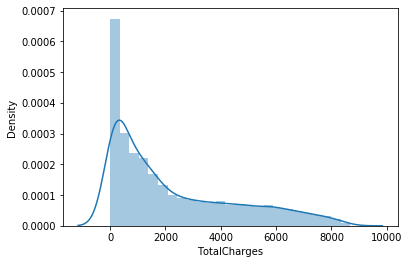

In [9]:
df.loc[df.TotalCharges.isnull(), 'TotalCharges'] = 0
sns.distplot(df.TotalCharges)
plt.show();

### Inference:
* Positive skewness is observed,Median is lesser than the mean.

In [10]:
print(df.PhoneService.value_counts())
print(df.MultipleLines.value_counts())
print(df.InternetService.value_counts())
print(df.OnlineSecurity.value_counts())
print(df.OnlineBackup.value_counts())
print(df.DeviceProtection.value_counts())
print(df.TechSupport.value_counts())
print(df.StreamingTV.value_counts())
print(df.StreamingMovies.value_counts())

Yes    6361
No      682
Name: PhoneService, dtype: int64
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64
No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64
No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64
No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


In [11]:
pd.crosstab(index = df["PhoneService"], columns = df["MultipleLines"])

MultipleLines,No,No phone service,Yes
PhoneService,,,
No,0,682,0
Yes,3390,0,2971


In [12]:
pd.crosstab(index = df["InternetService"], columns = df["StreamingMovies"])

StreamingMovies,No,No internet service,Yes
InternetService,,,
DSL,1440,0,981
Fiber optic,1345,0,1751
No,0,1526,0


In [13]:
def convert_no_service (df):
    col_to_transform = []
    for col in df.columns:
        if (df[col].dtype == "O") & (col != 'customerid'):
            if len(df[df[col].str.contains("No")][col].unique()) > 1:
                col_to_transform.append(col)
    
    print("Total column(s) to transform: {}".format(col_to_transform))
    for col in col_to_transform:
        df.loc[df[col].str.contains("No"), col] = 'No'
        
    return df

In [14]:
df = convert_no_service(df)

Total column(s) to transform: ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']


In [17]:
df.gender = df.gender.map(dict(Male=1, Female=0))
display(df.gender.value_counts())

1    3555
0    3488
Name: gender, dtype: int64

In [18]:
def encode_yes_no (df, columns_to_encode):
    for col in columns_to_encode:
        df[col] = df[col].map(dict(Yes = 1, No = 0))
        
    return df

In [19]:
encode_columns = []
for col in df.columns:
    keep = np.sort(df[col].unique(), axis = None)
    
    if ("Yes" in keep) & ("No" in keep):
        encode_columns.append(col)

del keep
print("Encode Columns Yes/No: {}".format(encode_columns))

Encode Columns Yes/No: ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']


In [20]:
df = encode_yes_no(df,encode_columns)
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,0,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,DSL,1,...,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,DSL,1,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,0,DSL,1,...,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


## 3. Data analysis & visualisation:


In [21]:
df.describe().transpose() #Generate descriptive statistics that summarize the central tendency and transposing it

,count,mean,std,min,25%,50%,75%,max
gender,7043.0,0.504756,0.500013,0.00,0.00,1.00,1.00,1.00
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.00,0.00,1.00
Partner,7043.0,0.483033,0.499748,0.00,0.00,0.00,1.00,1.00
Dependents,7043.0,0.299588,0.458110,0.00,0.00,0.00,1.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
PhoneService,7043.0,0.903166,0.295752,0.00,1.00,1.00,1.00,1.00
MultipleLines,7043.0,0.421837,0.493888,0.00,0.00,0.00,1.00,1.00
OnlineSecurity,7043.0,0.286668,0.452237,0.00,0.00,0.00,1.00,1.00
OnlineBackup,7043.0,0.344881,0.475363,0.00,0.00,0.00,1.00,1.00
DeviceProtection,7043.0,0.343888,0.475038,0.00,0.00,0.00,1.00,1.00


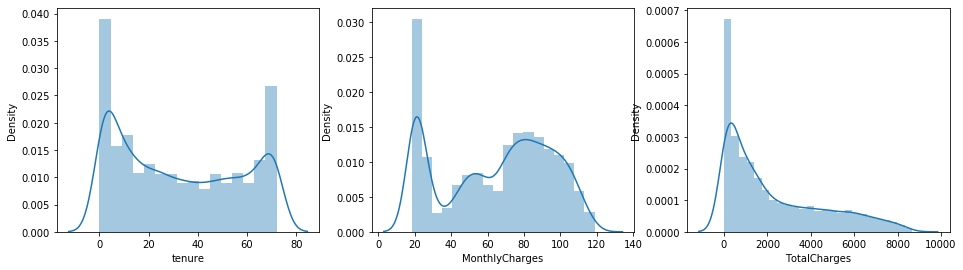

In [22]:
col=['tenure', 'MonthlyCharges', 'TotalCharges']

i=3
j=0
plt.figure(figsize=(16,14))
for k in col :
    plt.subplot(i,i,i*(j+1)//i)
    sns.distplot(df[k])
    j=j+1
plt.show()

#### Inference: 
* From the plots above it can be observed that **tenure** and **MonthlyCharges** are distributed evenly accross mean and hence Noramlly distibuted.
 - majority of subscribers have monthly charges between 20 and 30 units .
* **TotalCharges** is  positively skewed which means median is lesser than the mean.
 - Majority of subscribers have TotalSpending between 0 and 1500 units.
 - Majority (almost 70%) have TotalCharges less than 3500 units and maximum is 8684 units.

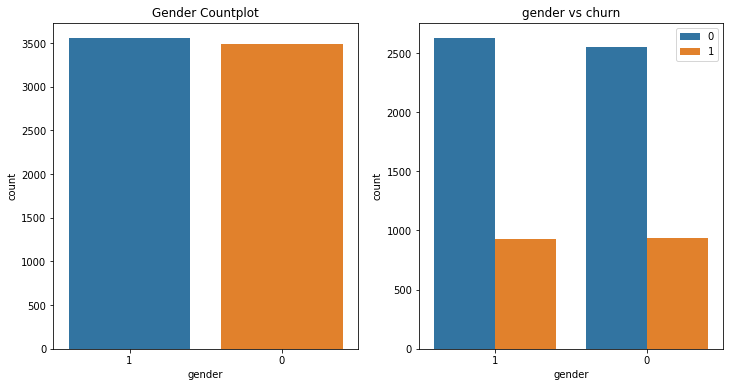

In [23]:
fig,axes = plt.subplots(nrows=1,ncols=2, figsize=(12,6) )
ax = sns.countplot(df['gender'],hue=df['Churn'],ax=axes[1],order = df["gender"].value_counts().index)
plt.legend()
ax.set_title('gender vs churn')
ax = sns.countplot(df['gender'],ax=axes[0],order = df["gender"].value_counts().index)
plt.legend()
ax.set_title('Gender Countplot')
plt.show()

### Inference:
* Both male and female subscribers are equal in number.
* The number of subscribers who stopped using the service is almost identical in both the genders.

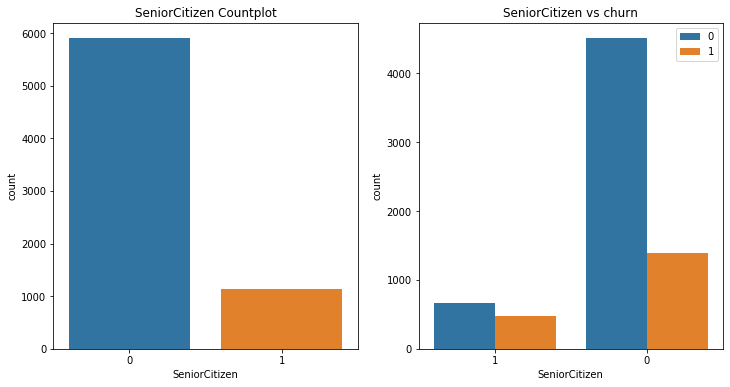

In [24]:
fig,axes = plt.subplots(nrows=1,ncols=2, figsize=(12,6) )
ax = sns.countplot(df['SeniorCitizen'],hue=df['Churn'],ax=axes[1],order = df["gender"].value_counts().index)
plt.legend()
ax.set_title('SeniorCitizen vs churn')
ax = sns.countplot(df['SeniorCitizen'],ax=axes[0],order = df["SeniorCitizen"].value_counts().index)
plt.legend()
ax.set_title('SeniorCitizen Countplot')
plt.show()

### Inference:
* Almost 90% of the senior Citizens went churn.
* Only around 30% of the subscribers went churn who weren't Senior Citizens.

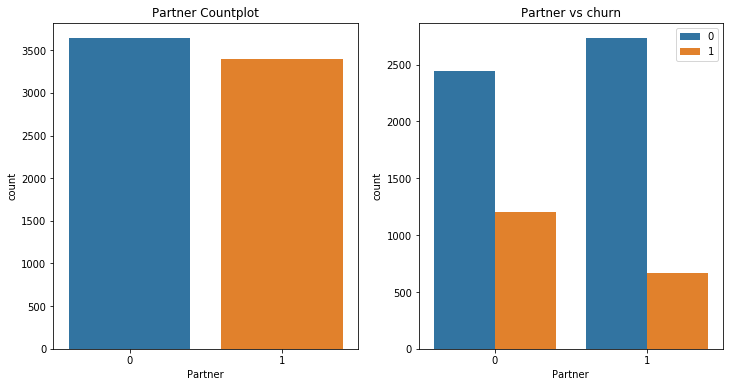

In [25]:
fig,axes = plt.subplots(nrows=1,ncols=2, figsize=(12,6) )
ax = sns.countplot(df['Partner'],hue=df['Churn'],ax=axes[1],order = df["Partner"].value_counts().index)
plt.legend()
ax.set_title('Partner vs churn')
ax = sns.countplot(df['Partner'],ax=axes[0],order = df["Partner"].value_counts().index)
plt.legend()
ax.set_title('Partner Countplot')
plt.show()

### Inference:
* Customers with parters and not having partners are almost identical.
* Customers with No partners went churn(almost 50%) the most compared to customers with partners.

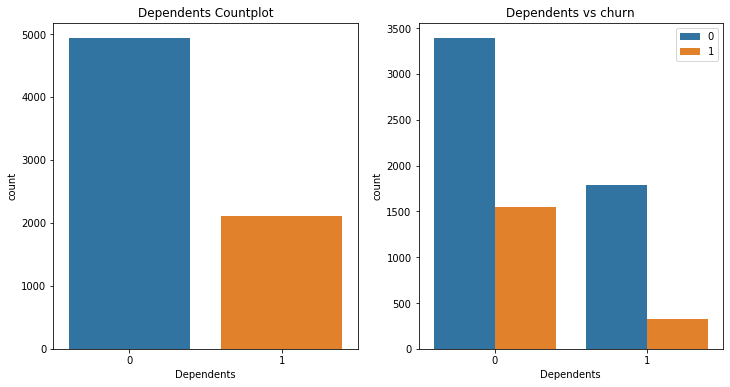

In [26]:
fig,axes = plt.subplots(nrows=1,ncols=2, figsize=(12,6) )
ax = sns.countplot(df['Dependents'],hue=df['Churn'],ax=axes[1],order = df["Dependents"].value_counts().index)
plt.legend()
ax.set_title('Dependents vs churn')
ax = sns.countplot(df['Dependents'],ax=axes[0],order = df["Dependents"].value_counts().index)
plt.legend()
ax.set_title('Dependents Countplot')
plt.show()

### Inference:
* Almost 70% of the customers are Independent and the rest 30% are dependent customers.
* 44% of the Independent customers went churn while only 23% of the dependent customers went churn.

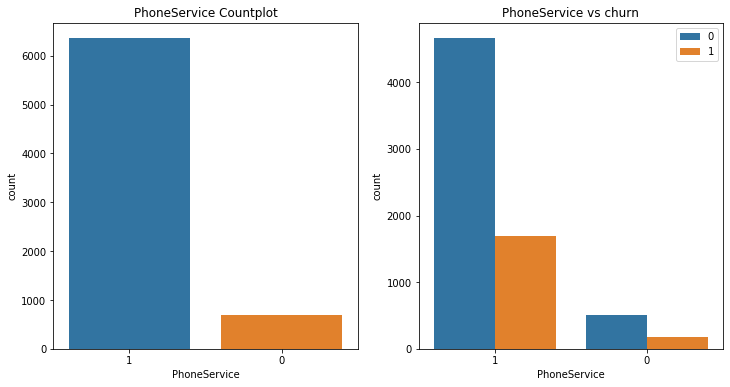

In [27]:
fig,axes = plt.subplots(nrows=1,ncols=2, figsize=(12,6) )
ax = sns.countplot(df['PhoneService'],hue=df['Churn'],ax=axes[1],order = df["PhoneService"].value_counts().index)
plt.legend()
ax.set_title('PhoneService vs churn')
ax = sns.countplot(df['PhoneService'],ax=axes[0],order = df["PhoneService"].value_counts().index)
plt.legend()
ax.set_title('PhoneService Countplot')
plt.show()

### Inference:
* Majority of the customers has a phone service.
* 30% of the customers with a phone service went churn.

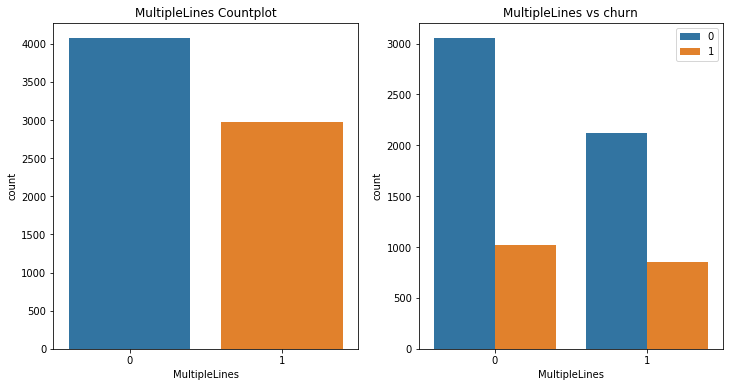

In [28]:
fig,axes = plt.subplots(nrows=1,ncols=2, figsize=(12,6) )
ax = sns.countplot(df['MultipleLines'],hue=df['Churn'],ax=axes[1],order = df["MultipleLines"].value_counts().index)
plt.legend()
ax.set_title('MultipleLines vs churn')
ax = sns.countplot(df['MultipleLines'],ax=axes[0],order = df["MultipleLines"].value_counts().index)
plt.legend()
ax.set_title('MultipleLines Countplot')
plt.show()

### Inference:
* Close to 30% of the customers with multiplelines went churn.
* But only 25% of the cutomers with a single line went churn.

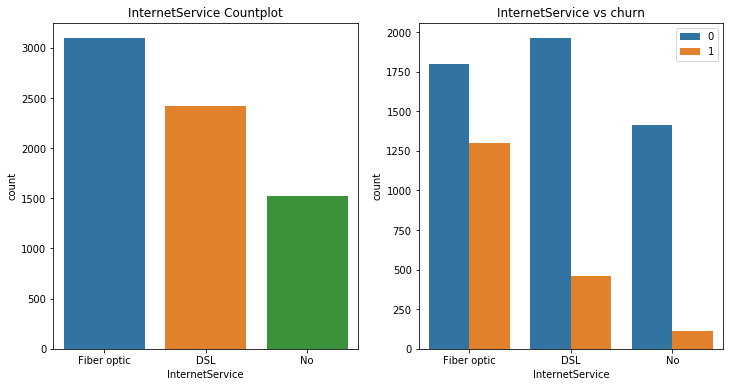

In [29]:
fig,axes = plt.subplots(nrows=1,ncols=2, figsize=(12,6) )
ax = sns.countplot(df['InternetService'],hue=df['Churn'],ax=axes[1],order = df["InternetService"].value_counts().index)
plt.legend()
ax.set_title('InternetService vs churn')
ax = sns.countplot(df['InternetService'],ax=axes[0],order = df["InternetService"].value_counts().index)
plt.legend()
ax.set_title('InternetService Countplot')
plt.show()

### Inference:
* Majority of the customers have A fiber optic connection followed by DSL services.
* Almost 40% of the customers with Fiber optic connection went churn.
* The customers with No internet services went churn the least.

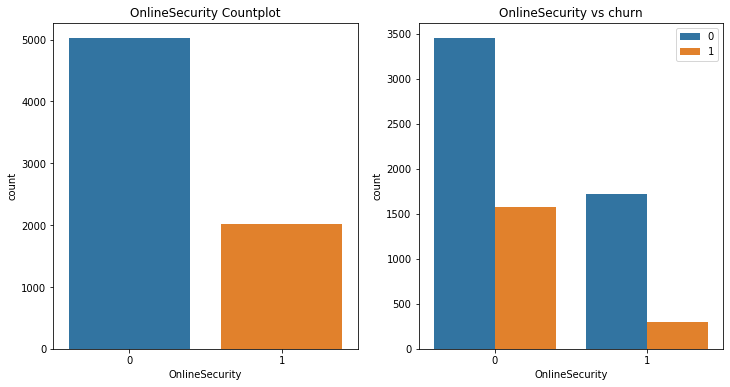

In [30]:
fig,axes = plt.subplots(nrows=1,ncols=2, figsize=(12,6) )
ax = sns.countplot(df['OnlineSecurity'],hue=df['Churn'],ax=axes[1],order = df["OnlineSecurity"].value_counts().index)
plt.legend()
ax.set_title('OnlineSecurity vs churn')
ax = sns.countplot(df['OnlineSecurity'],ax=axes[0],order = df["OnlineSecurity"].value_counts().index)
plt.legend()
ax.set_title('OnlineSecurity Countplot')
plt.show()

### Inference:
* Majority of the customers dosen't have Online security.
* 30% of the customers with No online security went churn.
* 20% of the custoemrs with online security went churn.

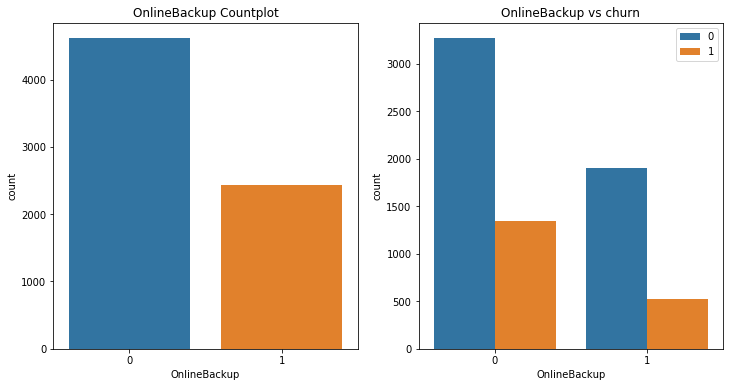

In [31]:
fig,axes = plt.subplots(nrows=1,ncols=2, figsize=(12,6) )
ax = sns.countplot(df['OnlineBackup'],hue=df['Churn'],ax=axes[1],order = df["OnlineBackup"].value_counts().index)
plt.legend()
ax.set_title('OnlineBackup vs churn')
ax = sns.countplot(df['OnlineBackup'],ax=axes[0],order = df["OnlineBackup"].value_counts().index)
plt.legend()
ax.set_title('OnlineBackup Countplot')
plt.show()

### Inference:
* The number of customers with Online backup is double the number of customers without any Online backup.
* Both, Customers with and without online backup went churn equally with close to 27% each.

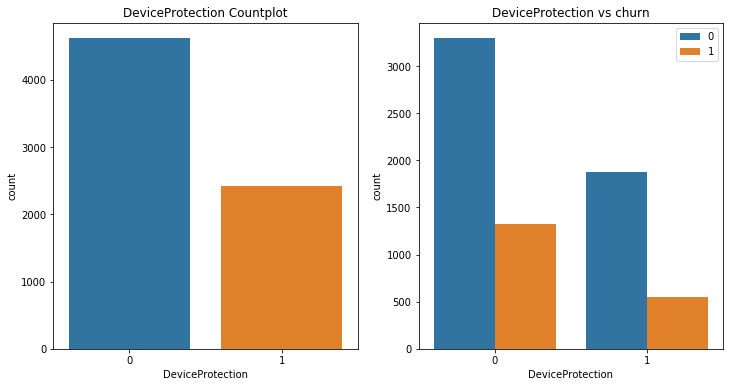

In [32]:
fig,axes = plt.subplots(nrows=1,ncols=2, figsize=(12,6) )
ax = sns.countplot(df['DeviceProtection'],hue=df['Churn'],ax=axes[1],order = df["DeviceProtection"].value_counts().index)
plt.legend()
ax.set_title('DeviceProtection vs churn')
ax = sns.countplot(df['DeviceProtection'],ax=axes[0],order = df["DeviceProtection"].value_counts().index)
plt.legend()
ax.set_title('DeviceProtection Countplot')
plt.show()

### Inference:
* People without any device protection are double the number of people with device protection.
* Both the customers with and without device protection went churn at a equal rate of 24%.

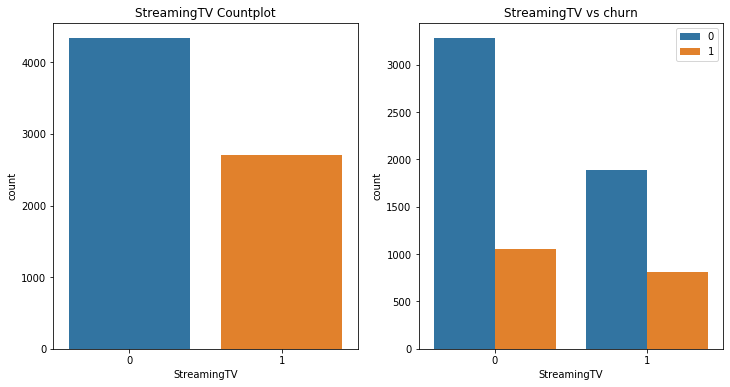

In [33]:
fig,axes = plt.subplots(nrows=1,ncols=2, figsize=(12,6) )
ax = sns.countplot(df['StreamingTV'],hue=df['Churn'],ax=axes[1],order = df["StreamingTV"].value_counts().index)
plt.legend()
ax.set_title('StreamingTV vs churn')
ax = sns.countplot(df['StreamingTV'],ax=axes[0],order = df["StreamingTV"].value_counts().index)
plt.legend()
ax.set_title('StreamingTV Countplot')
plt.show()

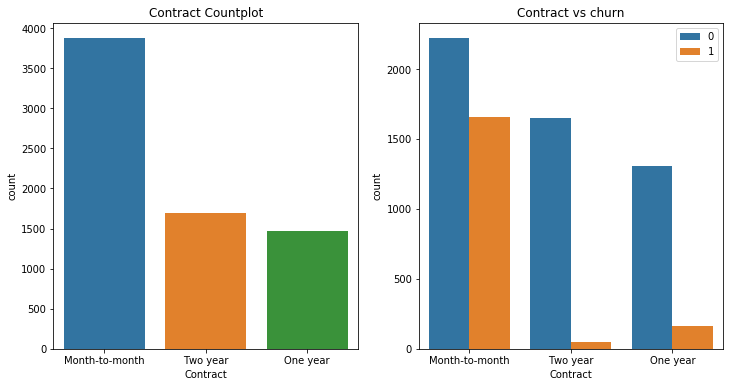

In [34]:
fig,axes = plt.subplots(nrows=1,ncols=2, figsize=(12,6) )
ax = sns.countplot(df['Contract'],hue=df['Churn'],ax=axes[1],order = df["Contract"].value_counts().index)
plt.legend()
ax.set_title('Contract vs churn')
ax = sns.countplot(df['Contract'],ax=axes[0],order = df["Contract"].value_counts().index)
plt.legend()
ax.set_title('Contract Countplot')
plt.show()

### Inference:
* Majority of the customers pay on a month-to-month basis followed by a two year contract and one year contract.
* Almost 44% of the customers who pay on month-to-month basis went churn.
* The customers with a two year contract went churn the least followed by one year contract.

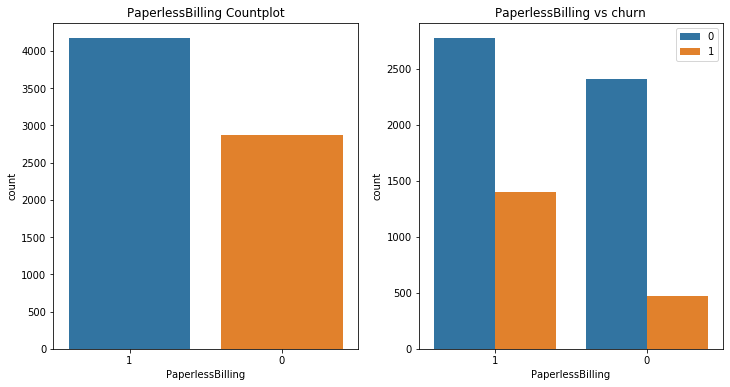

In [35]:
fig,axes = plt.subplots(nrows=1,ncols=2, figsize=(12,6) )
ax = sns.countplot(df['PaperlessBilling'],hue=df['Churn'],ax=axes[1],order = df["PaperlessBilling"].value_counts().index)
plt.legend()
ax.set_title('PaperlessBilling vs churn')
ax = sns.countplot(df['PaperlessBilling'],ax=axes[0],order = df["PaperlessBilling"].value_counts().index)
plt.legend()
ax.set_title('PaperlessBilling Countplot')
plt.show()

### Inference:
* Majority of the customers pay by parerless billing.
* Of the customers who pay via paperless billing, 33% went churn.

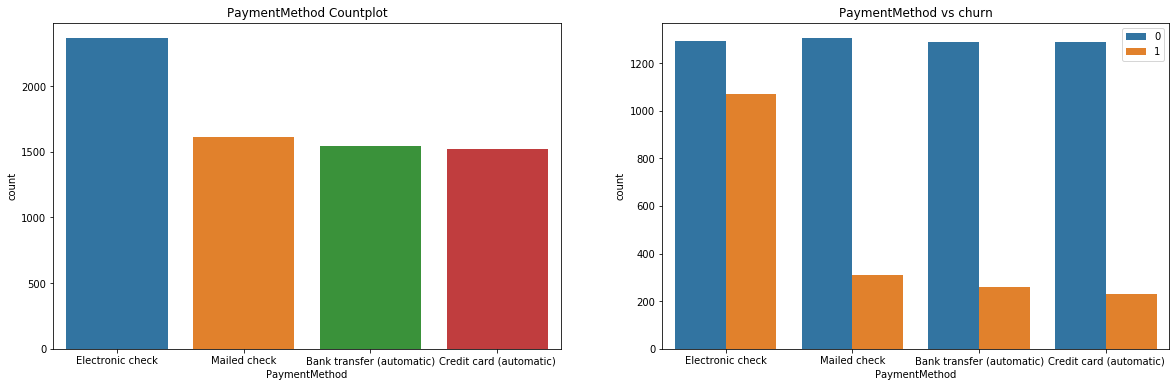

In [36]:
fig,axes = plt.subplots(nrows=1,ncols=2, figsize=(20,6) )
ax = sns.countplot(df['PaymentMethod'],hue=df['Churn'],ax=axes[1],order = df["PaymentMethod"].value_counts().index)
plt.legend()
ax.set_title('PaymentMethod vs churn')
ax = sns.countplot(df['PaymentMethod'],ax=axes[0],order = df["PaymentMethod"].value_counts().index)
plt.legend()
ax.set_title('PaymentMethod Countplot')
plt.show()

### Inference:
* Majority of the customers pay via electronic check and the other payment menthods are equally distributed.
* Almost half the customers who pay via electronic check went churn.
* Compared to Electronic check payment the churn rate of the other three methods is very less.

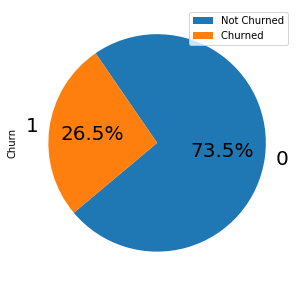

In [37]:
fig,ax = plt.subplots( figsize=(5,5) )
df['Churn'].value_counts(sort=False).plot(kind='pie',autopct='%1.1f%%', fontsize= 20,startangle=220)
plt.legend(['Not Churned','Churned '])
plt.show()

### Inference:
* The dataset is highly in favour of the NO churn group. This skewness may create a bias in the model. 

In [38]:
df = pd.get_dummies(df, columns = ['InternetService', 'Contract', 'PaymentMethod'],
prefix = ['ISP', 'contract', 'payment'])


In [39]:
df2 = df.drop('customerID', axis = 1, inplace = False)  # removing redundend features
df2.columns = df2.columns.str.replace(" ", "_")

In [40]:
df2.corr()['Churn'].sort_values(ascending=False)#Compute pairwise correlation of columns, excluding NA/null values.

Churn                                1.000000
contract_Month-to-month              0.405103
ISP_Fiber_optic                      0.308020
payment_Electronic_check             0.301919
MonthlyCharges                       0.193356
PaperlessBilling                     0.191825
SeniorCitizen                        0.150889
StreamingTV                          0.063228
StreamingMovies                      0.061382
MultipleLines                        0.040102
PhoneService                         0.011942
gender                              -0.008612
DeviceProtection                    -0.066160
OnlineBackup                        -0.082255
payment_Mailed_check                -0.091683
payment_Bank_transfer_(automatic)   -0.117937
ISP_DSL                             -0.124214
payment_Credit_card_(automatic)     -0.134302
Partner                             -0.150448
Dependents                          -0.164221
TechSupport                         -0.164674
OnlineSecurity                    

### Inference:
* A positive correlation is observed between **churn** and **Month-to-Month** contracts.
* Followed by **Fiber Optic ISP** and **Monthly charges**.

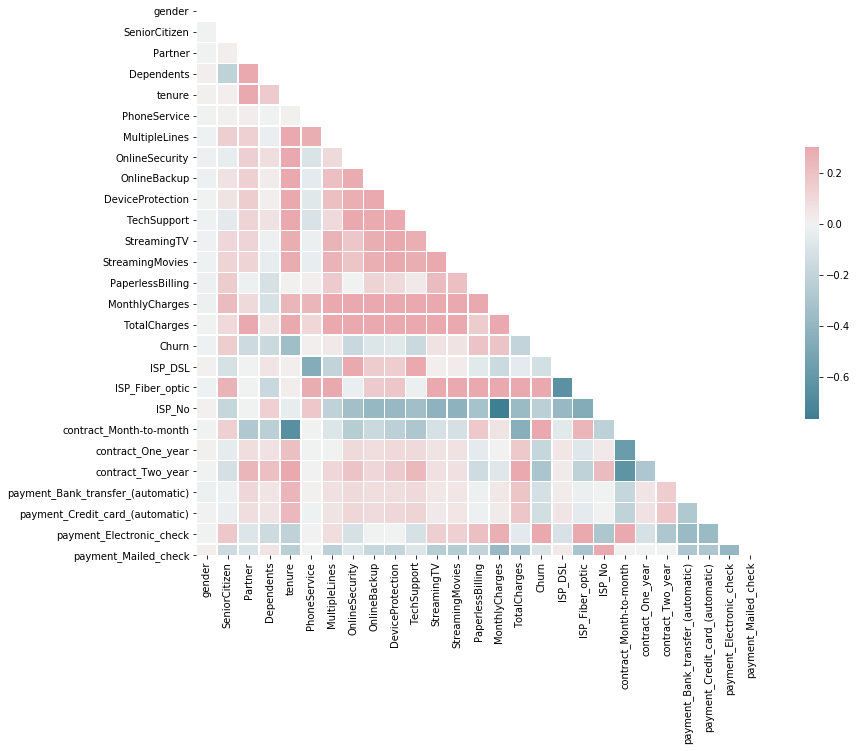

In [42]:
corr = df2.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(16, 10))                     #Create a figure and a set of subplots
cmap = sns.diverging_palette(220, 10, as_cmap=True)        #Make a diverging palette between two HUSL colors.
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, #Plot rectangular data as a color-encoded matrix.
            square=True, linewidths=.6, cbar_kws={"shrink": .5})
plt.show();

## 4. Data pre-processing:

In [52]:
X = df2.drop('Churn', axis = 1, inplace = False)   # segregating predictors and target attributes.
y = df2['Churn']

In [53]:
from imblearn.over_sampling import SMOTE           # Target balancing using SMOTE.
smote = SMOTE(sampling_strategy='minority')        # Class to perform over-sampling using SMOTE.
X_sm, y_sm=smote.fit_resample(X,y)

In [58]:
X_train, X_test, y_train,y_test= train_test_split(X_sm, y_sm,test_size=0.2,random_state=15)  #splitting training and testing data into 80:20 ratio

In [60]:
df3 = X_train

In [63]:
df3.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
gender,8278.0,0.434163,0.495676,0.00,0.000000,0.000000,1.000000,1.00
SeniorCitizen,8278.0,0.134332,0.341029,0.00,0.000000,0.000000,0.000000,1.00
Partner,8278.0,0.371467,0.483226,0.00,0.000000,0.000000,1.000000,1.00
Dependents,8278.0,0.214665,0.410615,0.00,0.000000,0.000000,0.000000,1.00
tenure,8278.0,27.549650,23.838212,0.00,5.000000,21.000000,48.000000,72.00
PhoneService,8278.0,0.900338,0.299567,0.00,1.000000,1.000000,1.000000,1.00
MultipleLines,8278.0,0.385963,0.486851,0.00,0.000000,0.000000,1.000000,1.00
OnlineSecurity,8278.0,0.202585,0.401950,0.00,0.000000,0.000000,0.000000,1.00
OnlineBackup,8278.0,0.270718,0.444357,0.00,0.000000,0.000000,1.000000,1.00
DeviceProtection,8278.0,0.274100,0.446087,0.00,0.000000,0.000000,1.000000,1.00


### Inference:
* From the above statistics it is observed that the values of majority of the statictics have changed compared to original dataset statistics.
- **Count** of the features have changed due to upsampling.
- **Mean** of the features have decreased.
- **standard deviation** has decreased.
- But the **Max** values are unchanged.

## 5. Model training, testing and tuning:

### 1. Bagging classifier using decision tree as base estimator.

Accuracy Score of Training Data:  0.9986711766127084

Accuracy Score of Test Data: 0.8449275362318841

Classification Report of Bagging Classification Model:
                precision    recall  f1-score   support

           0       0.85      0.86      0.85      1082
           1       0.84      0.83      0.84       988

    accuracy                           0.84      2070
   macro avg       0.84      0.84      0.84      2070
weighted avg       0.84      0.84      0.84      2070


Mean Absolute Error of Bagging Classification Model:
 0.15507246376811595

Confusion Matrix of Bagging Classification Model:
 [[927 155]
 [166 822]]


Text(0.5, 1, 'Confusion Matrix HeatMap of Bagging Classification Model')

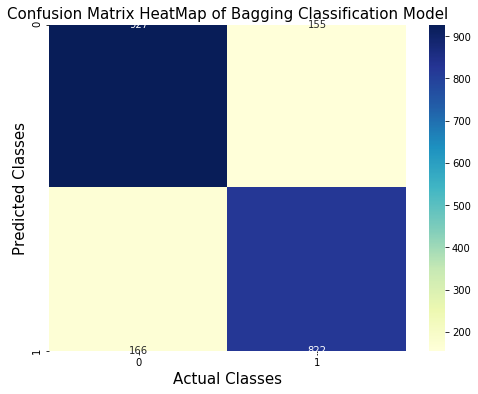

In [141]:
BG = BaggingClassifier(n_estimators = 300) #using Decision Tree Model as base estimator


BG = BG.fit(X_train, y_train)
y_predictBG = BG.predict(X_test)

modeltrBG_score = BG.score(X_train, y_train)
print('Accuracy Score of Training Data: ', modeltrBG_score)


cfm_BG = confusion_matrix(y_test, y_predictBG)


# evaluate accuracy
modelBG_score = accuracy_score(y_test, y_predictBG)
print('\nAccuracy Score of Test Data:', modelBG_score)
print('\nClassification Report of Bagging Classification Model:\n ', classification_report(y_test, y_predictBG))
print('\nMean Absolute Error of Bagging Classification Model:\n', mean_absolute_error(y_test, y_predictBG))
print('\nConfusion Matrix of Bagging Classification Model:\n', cfm_BG)

#visualization of confusion matrix in the form of a heatmap
plt.figure(figsize = (8, 6))
sns.heatmap(cfm_BG, annot = True, cmap = 'YlGnBu', fmt = 'd')
plt.xlabel('Actual Classes', fontsize = 15)
plt.ylabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix HeatMap of Bagging Classification Model', fontsize = 15)

In [143]:
precision_BG, recall_BG, f1_score_BG, support = precision_recall_fscore_support(y_test, y_predictBG, average = 'macro')
print('Precision Score :', '%0.2f' % precision_BG)
print('Recall Score :', '%0.2f' % recall_BG)
print('F1-Score :', '%0.2f' % f1_score_BG)
print('Accuracy Score :','%0.2f' % modelBG_score)

Precision Score : 0.84
Recall Score : 0.84
F1-Score : 0.84
Accuracy Score : 0.84


Accuracy Score of Training Data:  0.9937182894418942

Accuracy Score of Test Data: 0.8328502415458937

Classification Report of Bagging Classification Model:
                precision    recall  f1-score   support

           0       0.85      0.83      0.84      1082
           1       0.82      0.84      0.83       988

    accuracy                           0.83      2070
   macro avg       0.83      0.83      0.83      2070
weighted avg       0.83      0.83      0.83      2070


Mean Absolute Error of Bagging Classification Model:
 0.1671497584541063

Confusion Matrix of Bagging Classification Model:
 [[899 183]
 [163 825]]


Text(0.5, 1, 'Confusion Matrix HeatMap of Bagging Classification Model')

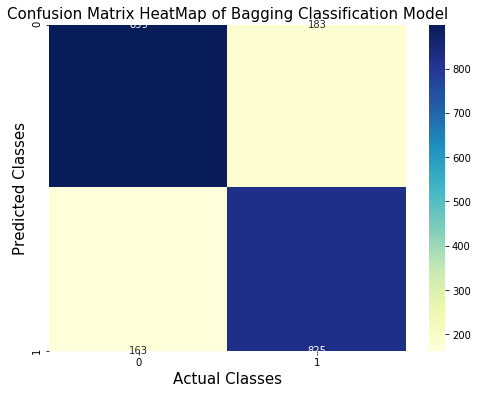

In [147]:
BG1 = BaggingClassifier(n_estimators = 15) #using Decision Tree Model as base estimator


BG1 = BG1.fit(X_train, y_train)
y_predictBG1 = BG1.predict(X_test)

modeltrBG1_score = BG1.score(X_train, y_train)
print('Accuracy Score of Training Data: ', modeltrBG1_score)


cfm_BG1 = confusion_matrix(y_test, y_predictBG1)


# evaluate accuracy
modelBG1_score = accuracy_score(y_test, y_predictBG1)
print('\nAccuracy Score of Test Data:', modelBG1_score)
print('\nClassification Report of Bagging Classification Model:\n ', classification_report(y_test, y_predictBG1))
print('\nMean Absolute Error of Bagging Classification Model:\n', mean_absolute_error(y_test, y_predictBG1))
print('\nConfusion Matrix of Bagging Classification Model:\n', cfm_BG1)

#visualization of confusion matrix in the form of a heatmap
plt.figure(figsize = (8, 6))
sns.heatmap(cfm_BG1, annot = True, cmap = 'YlGnBu', fmt = 'd')
plt.xlabel('Actual Classes', fontsize = 15)
plt.ylabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix HeatMap of Bagging Classification Model', fontsize = 15)

In [148]:
precision_BG1, recall_BG1, f1_score_BG1, support = precision_recall_fscore_support(y_test, y_predictBG1, average = 'macro')
print('Precision Score :', '%0.2f' % precision_BG1)
print('Recall Score :', '%0.2f' % recall_BG1)
print('F1-Score :', '%0.2f' % f1_score_BG1)
print('Accuracy Score :','%0.2f' % modelBG1_score)

Precision Score : 0.83
Recall Score : 0.83
F1-Score : 0.83
Accuracy Score : 0.83


### 2. AdaBoost Classifier using decision tree model as base estimator

In [103]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [100]:
cross_valid_scores = {}

In [118]:
%%time
parameters = {
    "n_estimators": [5, 10, 15, 20, 25, 50, 75, 100,350], 
    "learning_rate": [0.001, 0.01, 0.1, 1.],
}

model_adaboost = AdaBoostClassifier(
    random_state=42,
)

model_adaboost = GridSearchCV(
    model_adaboost, 
    parameters, 
    cv=5,
    scoring='accuracy',
)

model_adaboost.fit(X_train, y_train)

print('-----')
print(f'Best parameters {model_adaboost.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: '+ \
    f'{model_adaboost.best_score_:.3f}'
)
cross_valid_scores['ada_boost'] = model_adaboost.best_score_
print('-----')

-----
Best parameters {'learning_rate': 1.0, 'n_estimators': 350}
Mean cross-validated accuracy score of the best_estimator: 0.850
-----
CPU times: user 1min 33s, sys: 1.44 s, total: 1min 35s
Wall time: 1min 38s


In [139]:
AB1 = AdaBoostClassifier(n_estimators = 50) #using Decision Tree Model as base estimator
 
AB1 = AB1.fit(X_train, y_train)
y_predictAB1 = AB1.predict(X_test)

modeltrAB1_score = AB1.score(X_train, y_train)
print('Accuracy Score of Training Data: ', modeltrAB1_score)


cfm_AB1 = confusion_matrix(y_test, y_predictAB1)


# evaluate accuracy
modelAB1_score = accuracy_score(y_test, y_predictAB1)
print('\nAccuracy Score of Test Data:', modelAB1_score)
print('\nClassification Report of AdaBoost Classification Model:\n ', classification_report(y_test, y_predictAB1))
print('\nMean Absolute Error of AdaBoost Classification Model:\n', mean_absolute_error(y_test, y_predictAB1))
print('\nConfusion Matrix of AdaBoost Classification Model:\n', cfm_AB1)



Accuracy Score of Training Data:  0.84223242329065

Accuracy Score of Test Data: 0.8159420289855073

Classification Report of AdaBoost Classification Model:
                precision    recall  f1-score   support

           0       0.84      0.79      0.82      1082
           1       0.79      0.84      0.81       988

    accuracy                           0.82      2070
   macro avg       0.82      0.82      0.82      2070
weighted avg       0.82      0.82      0.82      2070


Mean Absolute Error of AdaBoost Classification Model:
 0.18405797101449275

Confusion Matrix of AdaBoost Classification Model:
 [[860 222]
 [159 829]]


In [142]:
precision_AB1, recall_AB1, f1_score_AB1, support = precision_recall_fscore_support(y_test, y_predictAB1, average = 'macro')
print('Precision Score :', '%0.2f' % precision_AB1)
print('Recall Score :', '%0.2f' % recall_AB1)
print('F1-Score :', '%0.2f' % f1_score_AB1)
print('Accuracy Score :','%0.2f' % modelAB1_score)

Precision Score : 0.82
Recall Score : 0.82
F1-Score : 0.82
Accuracy Score : 0.82


Accuracy Score of Training Data:  0.8602319400821454

Accuracy Score of Test Data: 0.8304347826086956

Classification Report of AdaBoost Classification Model:
                precision    recall  f1-score   support

           0       0.85      0.82      0.84      1082
           1       0.81      0.84      0.83       988

    accuracy                           0.83      2070
   macro avg       0.83      0.83      0.83      2070
weighted avg       0.83      0.83      0.83      2070


Mean Absolute Error of AdaBoost Classification Model:
 0.16956521739130434

Confusion Matrix of AdaBoost Classification Model:
 [[889 193]
 [158 830]]


Text(0.5, 1, 'Confusion Matrix HeatMap of AdaBoost Classification Model')

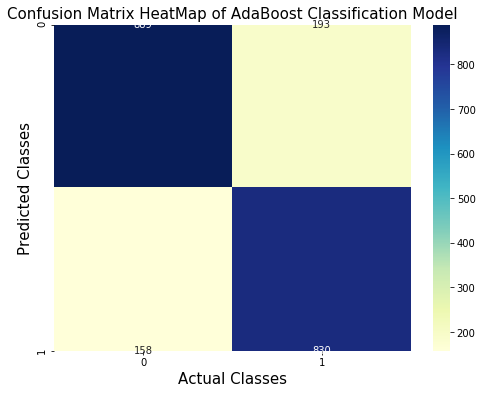

In [117]:
AB = AdaBoostClassifier(n_estimators = 350) #using Decision Tree Model as base estimator
 
AB = AB.fit(X_train, y_train)
y_predictAB = AB.predict(X_test)

modeltrAB_score = AB.score(X_train, y_train)
print('Accuracy Score of Training Data: ', modeltrAB_score)


cfm_AB = confusion_matrix(y_test, y_predictAB)


# evaluate accuracy
modelAB_score = accuracy_score(y_test, y_predictAB)
print('\nAccuracy Score of Test Data:', modelAB_score)
print('\nClassification Report of AdaBoost Classification Model:\n ', classification_report(y_test, y_predictAB))
print('\nMean Absolute Error of AdaBoost Classification Model:\n', mean_absolute_error(y_test, y_predictAB))
print('\nConfusion Matrix of AdaBoost Classification Model:\n', cfm_AB)

#visualization of confusion matrix in the form of a heatmap
plt.figure(figsize = (8, 6))
sns.heatmap(cfm_AB, annot = True, cmap = 'YlGnBu', fmt = 'd')
plt.xlabel('Actual Classes', fontsize = 15)
plt.ylabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix HeatMap of AdaBoost Classification Model', fontsize = 15)

In [123]:
precision_AB, recall_AB, f1_score_AB, support = precision_recall_fscore_support(y_test, y_predictAB, average = 'macro')
print('Precision Score :', '%0.2f' % precision_AB)
print('Recall Score :', '%0.2f' % recall_AB)
print('F1-Score :', '%0.2f' % f1_score_AB)
print('Accuracy Score :','%0.2f' % modelAB_score)

Precision Score : 0.83
Recall Score : 0.83
F1-Score : 0.83
Accuracy Score : 0.83


### 3.Random forest Classifier

In [119]:
%%time
parameters = {
    "n_estimators": [5, 10, 15, 20, 25,50,100,200,300], 
    "max_depth": [3, 5, 7, 9, 11, 13],
}

model_random_forest = RandomForestClassifier(
    random_state=42,
    class_weight='balanced',
)

model_random_forest = GridSearchCV(
    model_random_forest, 
    parameters, 
    cv=5,
    scoring='accuracy',
)

model_random_forest.fit(X_train, y_train)

print('-----')
print(f'Best parameters {model_random_forest.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: '+ \
    f'{model_random_forest.best_score_:.3f}'
)
cross_valid_scores['random_forest'] = model_random_forest.best_score_
print('-----')

-----
Best parameters {'max_depth': 13, 'n_estimators': 300}
Mean cross-validated accuracy score of the best_estimator: 0.848
-----
CPU times: user 1min 58s, sys: 2.35 s, total: 2min 1s
Wall time: 2min 5s


In [138]:
RF1 = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', max_depth = 5, min_samples_leaf = 5, random_state = 10)
RF1 = RF1.fit(X_train, y_train)
y_predictRF1 = RF1.predict(X_test)

modeltrRF1_score = RF.score(X_train, y_train)
print('Accuracy Score of Training Data: ', modeltrRF1_score)


cfm_RF1 = confusion_matrix(y_test, y_predictRF1)


# evaluate accuracy
modelRF1_score = accuracy_score(y_test, y_predictRF1)
print('\nAccuracy Score of Test Data:', modelRF1_score)
print('\nClassification Report of Random Forest Model:\n ', classification_report(y_test, y_predictRF1))
print('\nMean Absolute Error of Random Forest Model:\n', mean_absolute_error(y_test, y_predictRF1))
print('\nConfusion Matrix of Random Forest Model:\n', cfm_RF1)

Accuracy Score of Training Data:  0.8645808166223725

Accuracy Score of Test Data: 0.8028985507246377

Classification Report of Random Forest Model:
                precision    recall  f1-score   support

           0       0.86      0.75      0.80      1082
           1       0.76      0.87      0.81       988

    accuracy                           0.80      2070
   macro avg       0.81      0.81      0.80      2070
weighted avg       0.81      0.80      0.80      2070


Mean Absolute Error of Random Forest Model:
 0.19710144927536233

Confusion Matrix of Random Forest Model:
 [[807 275]
 [133 855]]


In [149]:
precision_RF1, recall_RF1, f1_score_RF1, support = precision_recall_fscore_support(y_test, y_predictRF1, average = 'macro')
print('Precision Score :', '%0.2f' % precision_RF1)
print('Recall Score :', '%0.2f' % recall_RF1)
print('F1-Score :', '%0.2f' % f1_score_RF1)
print('Accuracy Score :','%0.2f' % modelRF1_score)

Precision Score : 0.81
Recall Score : 0.81
F1-Score : 0.80
Accuracy Score : 0.80


Accuracy Score of Training Data:  0.8645808166223725

Accuracy Score of Test Data: 0.8323671497584542

Classification Report of Random Forest Model:
                precision    recall  f1-score   support

           0       0.85      0.82      0.84      1082
           1       0.81      0.85      0.83       988

    accuracy                           0.83      2070
   macro avg       0.83      0.83      0.83      2070
weighted avg       0.83      0.83      0.83      2070


Mean Absolute Error of Random Forest Model:
 0.1676328502415459

Confusion Matrix of Random Forest Model:
 [[886 196]
 [151 837]]


Text(0.5, 1, 'Confusion Matrix HeatMap of Random Forest Model')

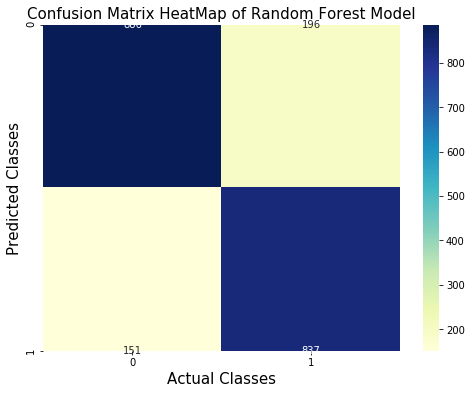

In [120]:
RF = RandomForestClassifier(n_estimators = 300, criterion = 'entropy', max_depth = 13, min_samples_leaf = 13, random_state = 10)
RF = RF.fit(X_train, y_train)
y_predictRF = RF.predict(X_test)

modeltrRF_score = RF.score(X_train, y_train)
print('Accuracy Score of Training Data: ', modeltrRF_score)


cfm_RF = confusion_matrix(y_test, y_predictRF)


# evaluate accuracy
modelRF_score = accuracy_score(y_test, y_predictRF)
print('\nAccuracy Score of Test Data:', modelRF_score)
print('\nClassification Report of Random Forest Model:\n ', classification_report(y_test, y_predictRF))
print('\nMean Absolute Error of Random Forest Model:\n', mean_absolute_error(y_test, y_predictRF))
print('\nConfusion Matrix of Random Forest Model:\n', cfm_RF)

#visualization of confusion matrix in the form of a heatmap
plt.figure(figsize = (8, 6))
sns.heatmap(cfm_RF, annot = True, cmap = 'YlGnBu', fmt = 'd')
plt.xlabel('Actual Classes', fontsize = 15)
plt.ylabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix HeatMap of Random Forest Model', fontsize = 15)

In [122]:
precision_RF, recall_RF, f1_score_RF, support = precision_recall_fscore_support(y_test, y_predictRF, average = 'macro')
print('Precision Score :', '%0.2f' % precision_RF)
print('Recall Score :', '%0.2f' % recall_RF)
print('F1-Score :', '%0.2f' % f1_score_RF)
print('Accuracy Score :','%0.2f' % modelRF_score)

Precision Score : 0.83
Recall Score : 0.83
F1-Score : 0.83
Accuracy Score : 0.83


### 4. Gradient boosting classifier

In [135]:
GB1 = GradientBoostingClassifier(n_estimators = 100, max_depth = 5, min_samples_leaf = 5, random_state = 10)
GB1 = GB1.fit(X_train, y_train)
y_predictGB1 = GB1.predict(X_test)

modeltrGB1_score = GB1.score(X_train, y_train)
print('Accuracy Score of Training Data: ', modeltrGB1_score)


cfm_GB1 = confusion_matrix(y_test, y_predictGB1)


# evaluate accuracy
modelGB1_score = accuracy_score(y_test, y_predictGB1)
print('\nAccuracy Score of Test Data:', modelGB1_score)
print('\nClassification Report of Gradient Boosting Classification Model:\n ', classification_report(y_test, y_predictGB1))
print('\nMean Absolute Error of Gradient Boosting Classification Model:\n', mean_absolute_error(y_test, y_predictGB1))
print('\nConfusion Matrix of Gradient Boosting Classification Model:\n', cfm_GB1)

Accuracy Score of Training Data:  0.9004590480792461

Accuracy Score of Test Data: 0.8449275362318841

Classification Report of Gradient Boosting Classification Model:
                precision    recall  f1-score   support

           0       0.85      0.85      0.85      1082
           1       0.83      0.84      0.84       988

    accuracy                           0.84      2070
   macro avg       0.84      0.84      0.84      2070
weighted avg       0.85      0.84      0.84      2070


Mean Absolute Error of Gradient Boosting Classification Model:
 0.15507246376811595

Confusion Matrix of Gradient Boosting Classification Model:
 [[917 165]
 [156 832]]


In [150]:
precision_GB1, recall_GB1, f1_score_GB1, support = precision_recall_fscore_support(y_test, y_predictGB1, average = 'macro')
print('Precision Score :', '%0.2f' % precision_GB1)
print('Recall Score :', '%0.2f' % recall_GB1)
print('F1-Score :', '%0.2f' % f1_score_GB1)
print('Accuracy Score :','%0.2f' % modelGB1_score)

Precision Score : 0.84
Recall Score : 0.84
F1-Score : 0.84
Accuracy Score : 0.84


Accuracy Score of Training Data:  0.9983087702343562

Accuracy Score of Test Data: 0.8565217391304348

Classification Report of Gradient Boosting Classification Model:
                precision    recall  f1-score   support

           0       0.86      0.87      0.86      1082
           1       0.85      0.85      0.85       988

    accuracy                           0.86      2070
   macro avg       0.86      0.86      0.86      2070
weighted avg       0.86      0.86      0.86      2070


Mean Absolute Error of Gradient Boosting Classification Model:
 0.14347826086956522

Confusion Matrix of Gradient Boosting Classification Model:
 [[938 144]
 [153 835]]


Text(0.5, 1, 'Confusion Matrix HeatMap of Gradient Boosting Classification Model')

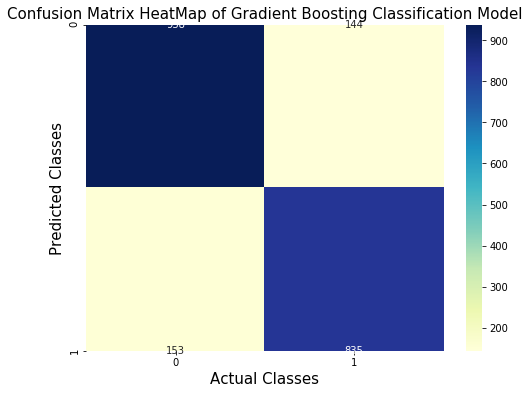

In [136]:
GB = GradientBoostingClassifier(n_estimators = 300, max_depth = 13, min_samples_leaf = 13, random_state = 10)
GB = GB.fit(X_train, y_train)
y_predictGB = GB.predict(X_test)

modeltrGB_score = GB.score(X_train, y_train)
print('Accuracy Score of Training Data: ', modeltrGB_score)


cfm_GB = confusion_matrix(y_test, y_predictGB)


# evaluate accuracy
modelGB_score = accuracy_score(y_test, y_predictGB)
print('\nAccuracy Score of Test Data:', modelGB_score)
print('\nClassification Report of Gradient Boosting Classification Model:\n ', classification_report(y_test, y_predictGB))
print('\nMean Absolute Error of Gradient Boosting Classification Model:\n', mean_absolute_error(y_test, y_predictGB))
print('\nConfusion Matrix of Gradient Boosting Classification Model:\n', cfm_GB)

#visualization of confusion matrix in the form of a heatmap
plt.figure(figsize = (8, 6))
sns.heatmap(cfm_GB, annot = True, cmap = 'YlGnBu', fmt = 'd')
plt.xlabel('Actual Classes', fontsize = 15)
plt.ylabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix HeatMap of Gradient Boosting Classification Model', fontsize = 15)

In [160]:
accuracy = accuracy_score(y_test, y_predictGB)*100
print('Accuracy of the Model is equal to ' + str(round(accuracy, 2)) + ' %.')

Accuracy of the Model is equal to 85.65 %.


In [151]:
precision_GB, recall_GB, f1_score_GB, support = precision_recall_fscore_support(y_test, y_predictGB, average = 'macro')
print('Precision Score :', '%0.2f' % precision_GB)
print('Recall Score :', '%0.2f' % recall_GB)
print('F1-Score :', '%0.2f' % f1_score_GB)
print('Accuracy Score :','%0.2f' % modelGB_score)

Precision Score : 0.86
Recall Score : 0.86
F1-Score : 0.86
Accuracy Score : 0.86


In [155]:
mdllsts = []

mdllsts.append(['Random Forest Classifier',modeltrRF_score * 100, modelRF_score * 100, recall_RF * 100, precision_RF * 100])
mdllsts.append(['Random Forest Classifier1',modeltrRF1_score * 100, modelRF1_score * 100, recall_RF1 * 100, precision_RF1 * 100])
mdllsts.append(['Bagging Classifier1', modeltrBG1_score * 100, modelBG1_score * 100, recall_BG1 * 100, precision_BG1 * 100])
mdllsts.append(['Bagging Classifier', modeltrBG_score * 100, modelBG_score * 100, recall_BG * 100, precision_BG * 100])
mdllsts.append(['AdaBoost Classifier1', modeltrAB1_score * 100, modelAB1_score * 100, recall_AB1 * 100, precision_AB1 * 100])
mdllsts.append(['AdaBoost Classifier', modeltrAB_score * 100, modelAB_score * 100, recall_AB * 100, precision_AB * 100])
mdllsts.append(['Gradient Boosting Classifier', modeltrGB_score * 100, modelGB_score * 100, recall_GB * 100, precision_GB * 100])
mdllsts.append(['Gradient Boosting Classifier1', modeltrGB1_score * 100, modelGB1_score * 100, recall_GB1 * 100, precision_GB1 * 100])            

mdl_e_df = pd.DataFrame(mdllsts, columns = ['Model', 'Accuracy Score of Training Data', 'Accuracy Score of Test Data', 'Recall Score', 'Precision Score'])
mdl_e_df

,Model,Accuracy Score of Training Data,Accuracy Score of Test Data,Recall Score,Precision Score
0,Random Forest Classifier,86.458082,83.236715,83.300998,83.232452
1,Random Forest Classifier1,86.458082,80.289855,80.561283,80.757390
2,Bagging Classifier1,99.371829,83.285024,83.294450,83.248419
3,Bagging Classifier,99.867118,84.492754,84.436529,84.473775
4,AdaBoost Classifier1,84.223242,81.594203,81.694661,81.636863
5,AdaBoost Classifier,86.023194,83.043478,83.085379,83.021592
6,Gradient Boosting Classifier,99.830877,85.652174,85.602741,85.633641
7,Gradient Boosting Classifier1,90.045905,84.492754,84.480494,84.455837


Text(0.5, 1.0, 'Comparison of Classification Models')

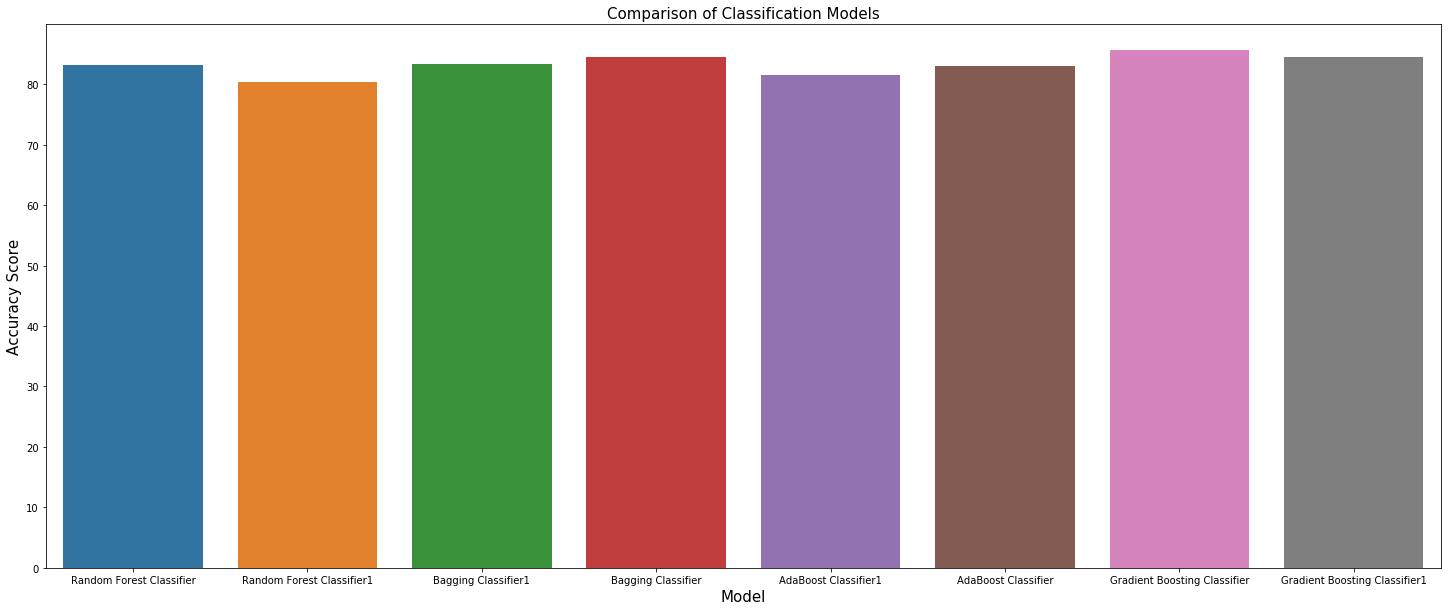

In [157]:
plt.figure(figsize = (25, 10))
sns.barplot(x = mdl_e_df['Model'], y = mdl_e_df['Accuracy Score of Test Data'], data = mdl_e_df)
plt.xlabel('Model', fontsize = 15)
plt.ylabel('Accuracy Score', fontsize = 15)
plt.title('Comparison of Classification Models', fontsize = 15)

### Inference:
* from the above graph it is infered that **Gradient Boosting classifier** with n=300 is the best model with accuracy score of training data being 99.8% and accuracy score of test data being 85.7%.

In [158]:
import pickle

In [159]:
PKL_filename = "pickle_GB_Model.pkl"

with open(PKL_filename,'wb') as file:
    pickle.dump(GB,file)

## 6. Conclusions and Improvisations:


* The Accuracy of the Gradient bossting with **n=300** is found to be the best fit model with score of **85.70%** which is almost 3 percent more than regular GB model.
* Mean absolute error the the Gradient boosting classifier is 0.14
* **NO churn** has a recall of 87%, which means that among the customers who churn, The GB model predicted 87% of them to churn.
* **Churn** has recall of 85%, which means that among thecustomers who churn The The GB model predicted 85% of them to Churn.
* **No churn** has a precision of 86%, The model predicted the correctly 86% times. we can infer that the model has done really well in prediction NO churn condition as it has high recall and precision.
* The f1 score of 85% tells the percentage of positive predictions which were correct.
* This GB classifier has reduced both the **type1** and **type2** errors.

            +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
           
* Fiber Optic subscribers who have higher monthly charges are likely to churn more than those who don't have Fiber optic
* Month-to-Month contract has the most impact on a subscriber to churn or Not to churn.
            +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
           
#### Suggestions for Future Data collection:

* Clearer description and understanding of what the features means should be provided for better analysis and feature engineering.
* More data of the customers who churned should be recorded to extract meaningful insights.
* A **customer feedback** should be recorded for subscribers who churned and by doing sentiment analysis meaningful insights can be gathered.
* **Monthly rating** of the subscription should be added to features list to predict future customers who can churn
* **Usage in minutes** of the subscription should be recorded for each subscriber, for example- the amount of tv streaming and streaming movies. 
* In the partner column, If partner is yes, then does the partner has a subscription or not can also be added because if one has the subscription the other could cancel the subscription.